# 06_Results_Gridtracer

In this file we analyzed and visualized the experiment results of the GridTracer experiments (05_Experiment_Gridtracer).

Parts of the plotting functions were adapted from chatGPT.

In [1]:
import json 
import matplotlib.pyplot as plt 
import pandas as pd
import glob
import os
import numpy as np

In [4]:
# adapt the selection of the output directories from which you want to visualize training results
# adapt the resolutions for which you want to visualize results

plotting_files = ['/workspace/output/gridtracer/output_resnet101_3x_lr0.001_bs5_10']
                  #output_new_res030_03.29.15.14',
                         #'/workspace/output/output_new_res035_03.29.18.25',
                         #'/workspace/output/output_new_res040_03.29.21.36',
                         #'/workspace/output/output_new_res045_03.30.00.47',
                         #'/workspace/output/output_new_res050_03.30.03.59',
                         #'/workspace/output/output_new_res070_03.30.07.10',
                         #'/workspace/output/output_new_res100_03.30.10.22']

resolution_set = ['030'] #,'035','040','045','050','070','100']

def plot_metrics(plotting_files, 
                 resolution_set, 
                window_divider = 10,   # divides the number of iterations for averaging window set
                losses = ['loss_box_reg', 'validation_loss', 'loss_cls', 'total_loss', 'bbox/AP50']): 
    ap50_max = []
    ap50_last = []

    plt.figure(figsize = (20,20))
    for n, loss in enumerate(losses):
        plt.subplot(2,3,n+1)

        for latest_file, res in zip(plotting_files, resolution_set):

            def load_json_arr(json_path):
                lines = []
                with open(json_path, 'r') as f:
                    for line in f:
                        lines.append(json.loads(line))
                return lines

            experiment_metrics = load_json_arr(latest_file + f'/metrics.json')

            ap50_max.append(max([met["bbox/AP50"] for met in experiment_metrics if 'bbox/AP50' in met and 'validation_loss' in met]))
            ap50_last.append([met["bbox/AP50"] for met in experiment_metrics  if 'bbox/AP50' in met and 'validation_loss' in met][-1])

            # Extract the values for the specified loss
            loss_values = [x[loss] for x in experiment_metrics if loss in x]

            if loss not in ['validation_loss','bbox/AP50'] and window_divider >0:
                window_size = round(len(loss_values)/window_divider)

                # Calculate the rolling average of the loss over a specified window size
                loss_avg = np.convolve(loss_values, np.ones(window_size) / window_size, mode='valid')


                plt.plot(
                    [x['iteration'] for x in experiment_metrics if loss in x][window_size-1:], 
                    loss_avg, 
                    label = res,
                    alpha = 0.5
                )
                plt.xlabel('iteration')
                plt.ylabel('loss')
                plt.title(loss)
                plt.legend()
                plt.grid()

            else: 
                plt.plot(
                    [x['iteration'] for x in experiment_metrics if loss in x], 
                    loss_values, 
                    label = res,
                    alpha = 0.5
                )
                plt.xlabel('iteration')
                plt.ylabel('loss')
                plt.title(loss)
                plt.legend()
                plt.grid()

    plt.show()


    plt.plot([int(res) for res in resolution_set], ap50_max[:len(resolution_set)], label = "max")
    plt.scatter([int(res) for res in resolution_set], ap50_max[:len(resolution_set)])
    plt.plot([int(res) for res in resolution_set], ap50_last[:len(resolution_set)], label = 'last')
    plt.scatter([int(res) for res in resolution_set], ap50_last[:len(resolution_set)])
    plt.legend()
    plt.grid()
    plt.xlabel('resolution')
    plt.ylabel("AP50")
    plt.show()
    
    print(ap50_max)
    print(ap50_last)
    

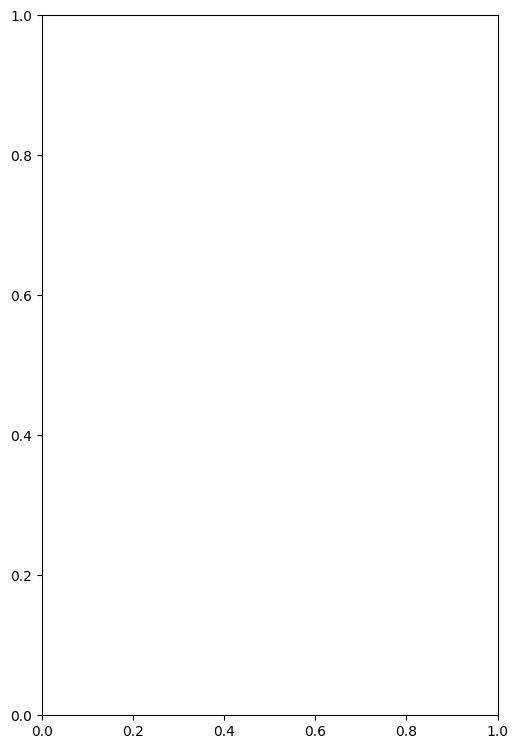

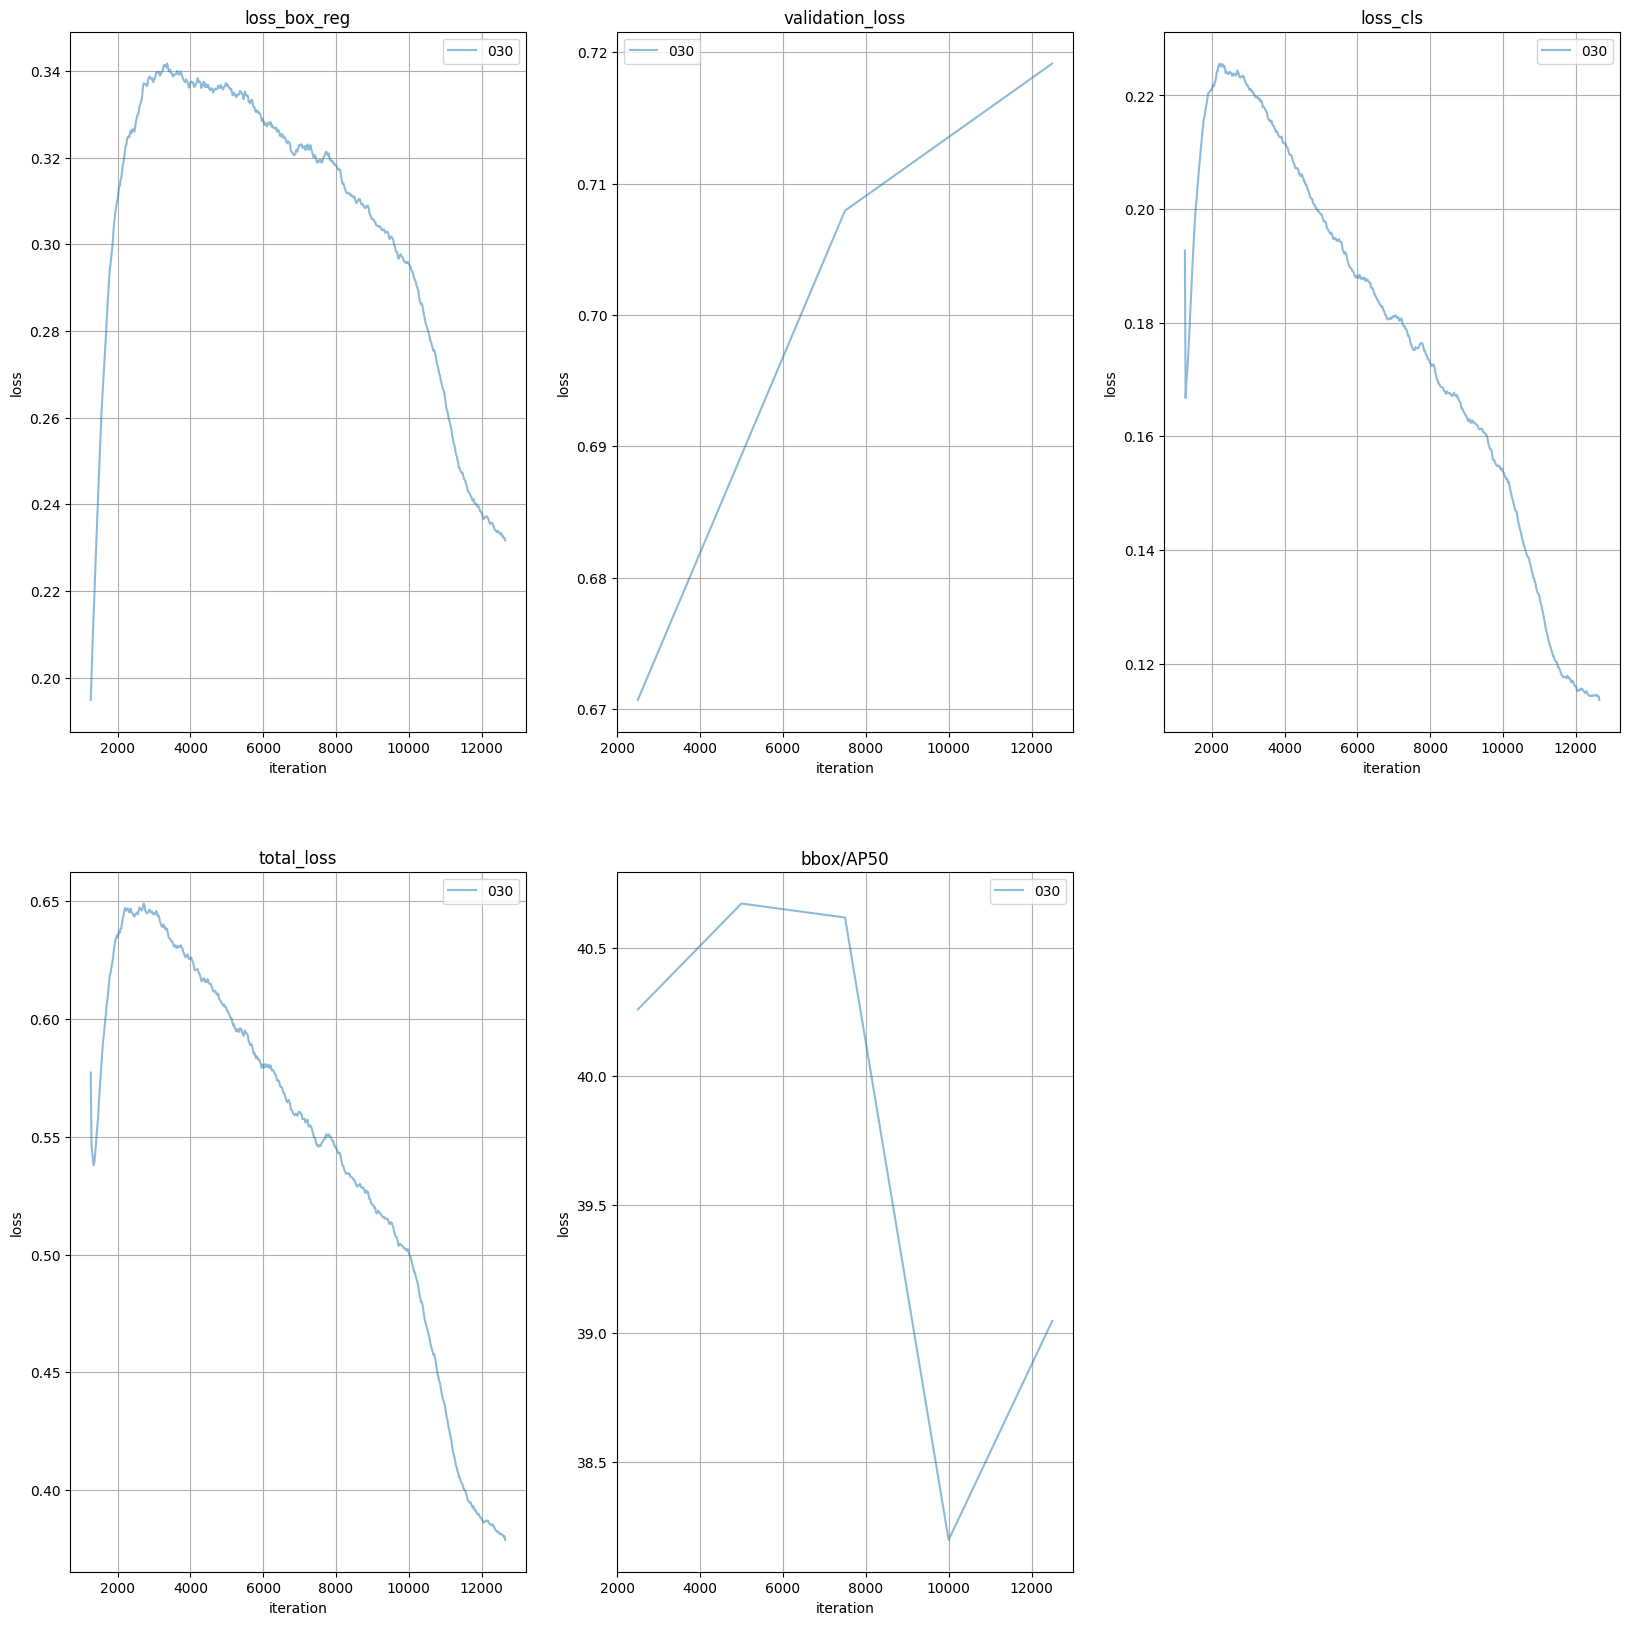

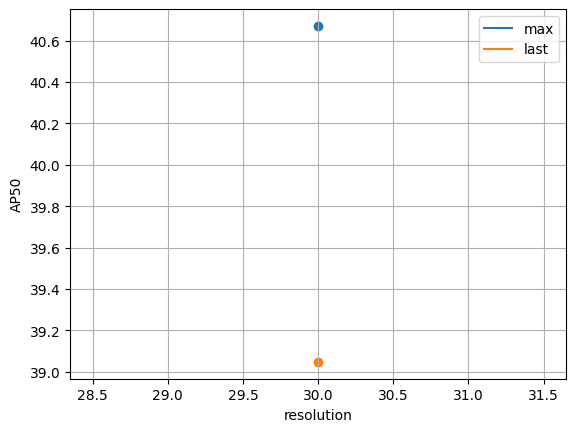

[40.67161930440691, 40.67161930440691, 40.67161930440691, 40.67161930440691, 40.67161930440691]
[39.047559922042005, 39.047559922042005, 39.047559922042005, 39.047559922042005, 39.047559922042005]


In [5]:
plot_metrics(plotting_files, resolution_set)